In [ ]:
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [6]:
autostrade = geopandas.read_file("/content/drive/MyDrive/Autostrade_10000_CT10_line.zip")
province = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")

Visualizzare su una mappa i confini delle province lombarde e le autostrade. Le autostrade devono essere in grigio e i confini delle province in nero

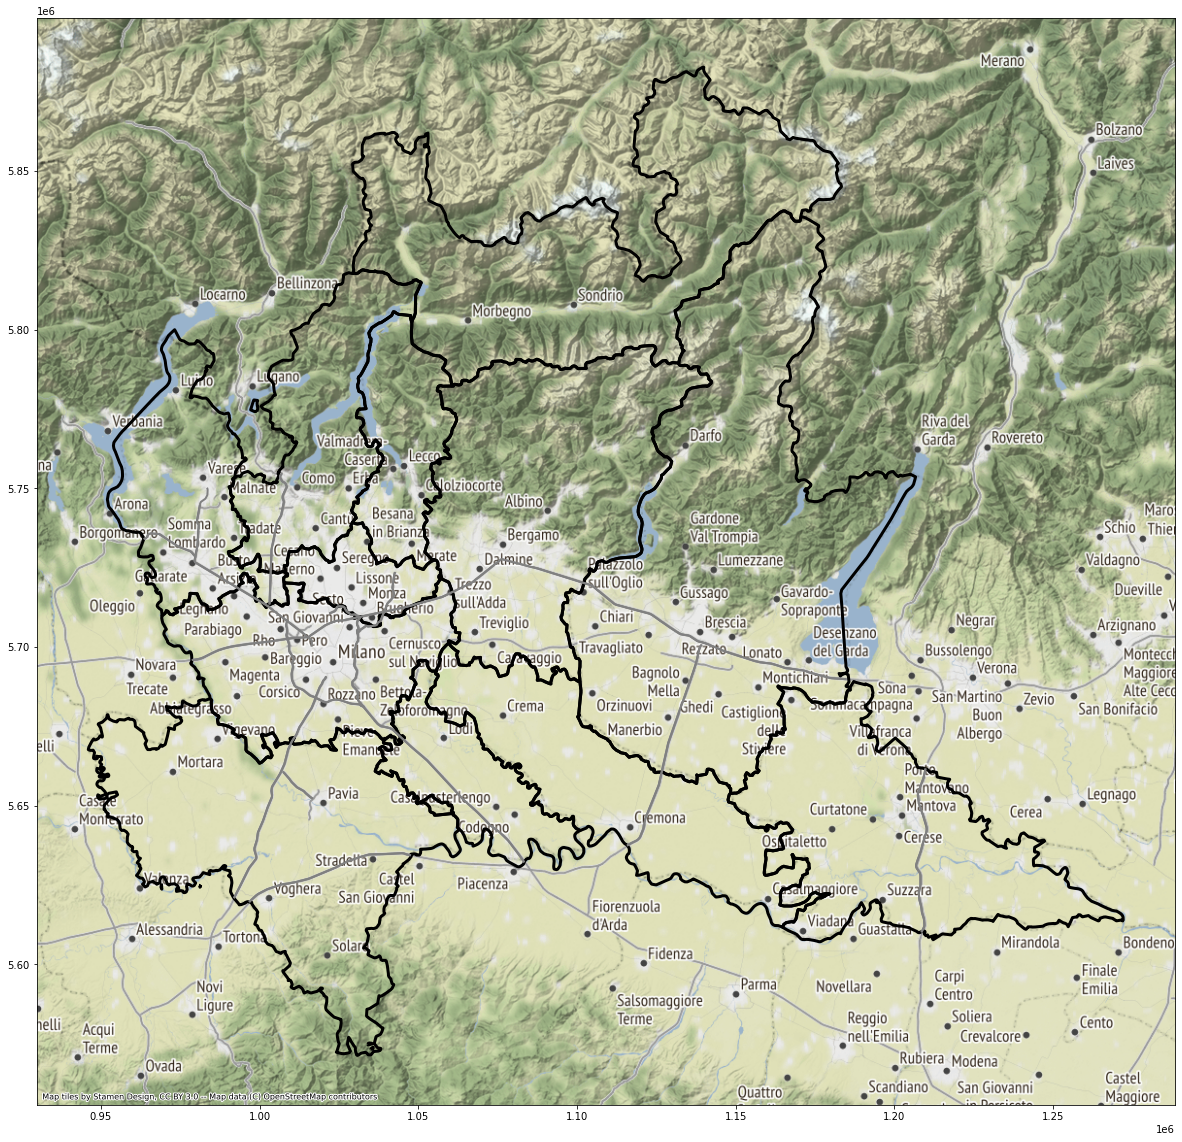

In [7]:
lombardia = regioni[regioni.DEN_REG == "Lombardia"]
prov_Lombardia = province[province.within(lombardia.geometry.squeeze())]

ax = prov_Lombardia.to_crs(epsg=3857).plot(figsize = (30,20), facecolor = "none", edgecolor = "k", linewidth = 3)
autostrade.to_crs(epsg=3857).plot(ax = ax, edgecolor = "grey", linewidth = 2)
ctx.add_basemap(ax)

Visualizzare su una mappa le province attraversate da una certa autosatrada inserita dall'utente. Controllare che l'autostrada sia effettivamente: in caso contrario fornire un opportuno messaggio di errore. Colorare le province in verde, facendo in modo che la mappa al di sotto risulti visibile

Inserisci autostrada: TANGENZIALE EST DI MILANO


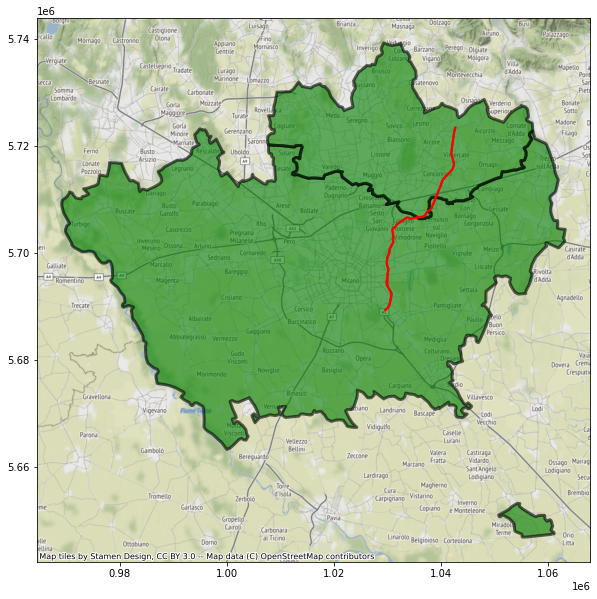

In [8]:
user = input("Inserisci autostrada: ")
lst = list(autostrade.PERCORSO)

if user not in lst:
  print("Autostrada non esistente")
else:
  mappa_user = autostrade[autostrade.PERCORSO == user]
  province_user = province[province.intersects(mappa_user.unary_union)]
  ax = province_user.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "green", edgecolor = "k", linewidth = 3, alpha = 0.6)
  mappa_user.to_crs(epsg=3857).plot(ax = ax, edgecolor = "red", linewidth = 2)
  ctx.add_basemap(ax)

Visualizzare tutti i comuni che si trovano ad una certa distanza da una autostrada. L'utente inserisce il nome dell'autostrada e la distanza e il programma deve visualizzare una mappa con l'autostrada in nero e i comuni in rosso

Visualizazre su una mappa i parchi lombardi che non sono attraversati da nessuna autostrada

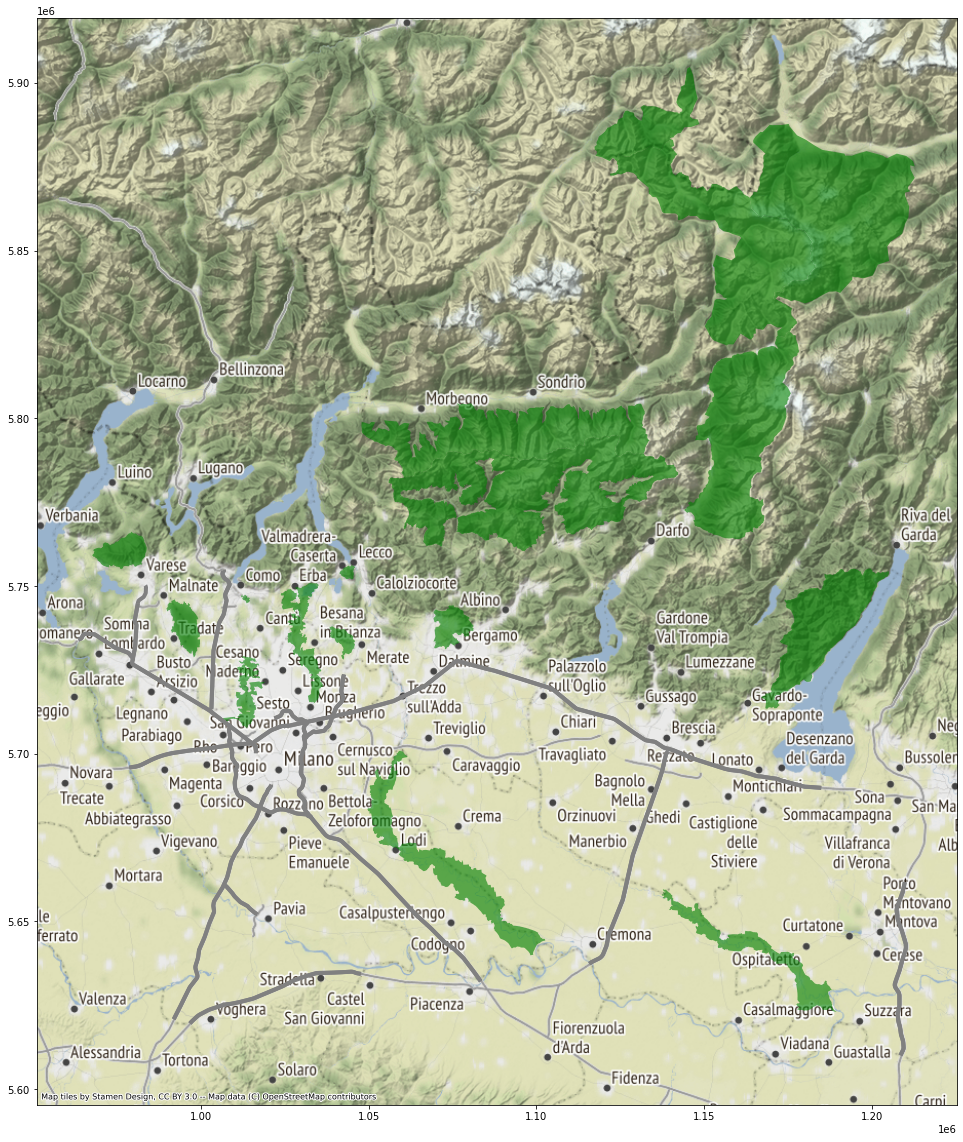

In [10]:
parchi = geopandas.read_file("/content/drive/MyDrive/Parchi_regionali_e_nazionali_polygon.zip")

parchi_attraversati = parchi[parchi.intersects(autostrade.unary_union)]
parchi_non_attraversati = parchi.drop(parchi_attraversati.index)

ax = parchi_non_attraversati.to_crs(epsg=3857).plot(figsize = (30,20), facecolor = "g", alpha = 0.6)
autostrade.to_crs(epsg=3857).plot(ax = ax, edgecolor = "grey", linewidth = 4)
ctx.add_basemap(ax)